In [303]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as hc
import scipy.spatial.distance as sd
import pylab as pl
import simplemapplot

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [373]:
votes_ds = pd.read_csv("votes.csv", index_col=0)
filled_ds = votes_ds.fillna(vots_ds.mean())[list(votes_ds)[-10:]]
filled_ds

,1940,1944,1948,1952,1956,1960,1964,1968,1972,1976
Alabama,14.340000,18.200000,19.040000,35.02000,39.39000,41.75,69.5,14.0,72.4,43.48
Alaska,40.379375,42.669375,41.900417,55.76375,56.13375,50.94,34.1,45.3,58.1,62.91
Arizona,36.010000,40.900000,43.820000,58.35000,60.99000,55.52,50.4,54.8,64.7,58.62
Arkansas,20.870000,29.840000,21.020000,43.76000,45.82000,43.06,43.9,30.8,68.9,34.97
California,41.350000,42.990000,47.140000,56.39000,55.40000,50.10,40.9,47.8,55.0,50.89
Colorado,50.920000,53.210000,46.520000,60.27000,59.49000,54.63,38.7,50.5,62.6,55.89
Connecticut,46.300000,46.940000,49.550000,55.70000,63.73000,46.27,32.2,44.3,58.6,52.64
Delaware,45.050000,45.270000,50.040000,51.75000,55.09000,49.00,39.1,45.1,59.6,47.27
Florida,25.990000,29.680000,33.630000,55.01000,57.20000,51.51,48.9,40.5,71.9,46.83
Georgia,14.840000,18.250000,18.310000,30.34000,33.22000,37.44,54.1,30.4,75.0,33.02


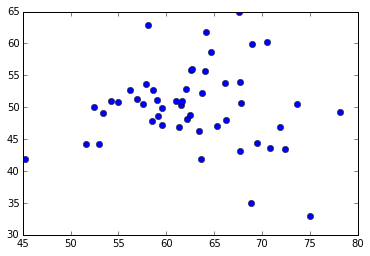

In [433]:
pl.plot(filled_ds["1972"], filled_ds["1976"], "o")

Distance matrix computed. Length: 1225
Hierarchical clustering completed.


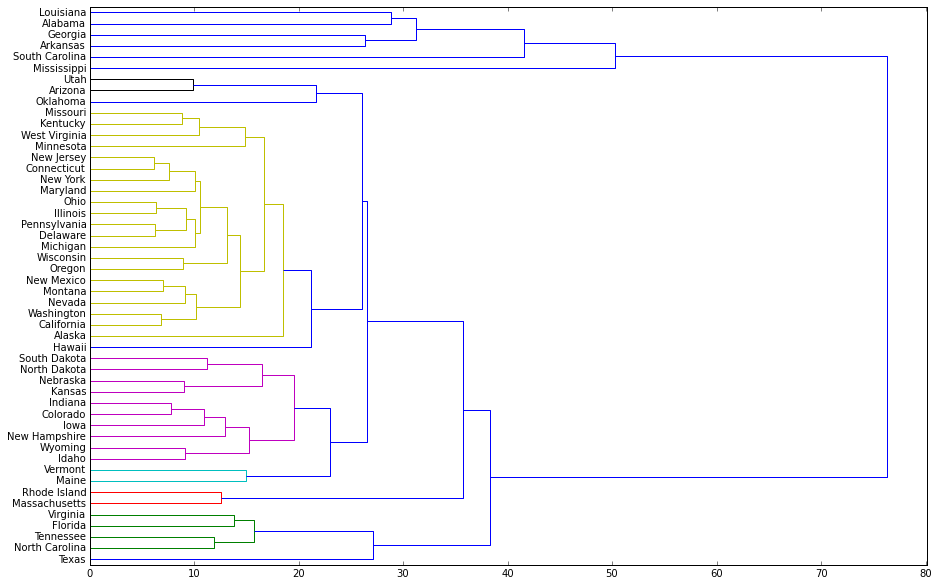

In [425]:
dm = sd.pdist(filled_ds, metric="euclidean")
print 'Distance matrix computed. Length:', len(dm) 
link = hc.linkage(dm, method="average")
print 'Hierarchical clustering completed.'

pl.figure(figsize=(15,10))
hc.dendrogram(link, orientation="left", labels=filled_ds.index, color_threshold=20)
pl.show()

In [426]:
real_csv = pd.read_csv("2012.csv", index_col=0, sep="\t", header=None, names=range(20))

In [427]:
real_csv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Alabama,WTA,"795,696",38.36%,–,"1,255,925",60.55%,9,"12,328",0.59%,–,"3,397",0.16%,–,"6,992",0.34%,–,"–460,229",−22.19%,"2,074,338",AL
Alaska,WTA,"122,640",40.81%,–,"164,676",54.80%,3,"7,392",2.46%,–,"2,917",0.97%,–,"2,870",0.96%,–,"–42,036",−13.99%,"300,495",AK
Arizona,WTA,"1,025,232",44.59%,–,"1,233,654",53.65%,11,"32,100",1.40%,–,"7,816",0.34%,–,452,0.02%,–,"–208,422",−9.06%,"2,299,254",AZ
Arkansas,WTA,"394,409",36.88%,–,"647,744",60.57%,6,"16,276",1.52%,–,"9,305",0.87%,–,"1,734",0.16%,–,"–253,335",−23.69%,"1,069,468",AR
California,WTA,"7,854,285",60.24%,55,"4,839,958",37.12%,–,"143,221",1.10%,–,"85,638",0.66%,–,"115,445",0.89%,–,"3,014,327",23.12%,"13,038,547",CA


In [428]:
results_2012 = real_csv[5].apply(lambda x: float(x[:-1]) / 100)

In [429]:
abbr = real_csv[19]

In [430]:
cls = hc.fcluster(link, 37, criterion='distance')
clust = dict(map(lambda x: (abbr[x[0]][:2], x[1]), zip(filled_ds.index, cls)))
example_colors = [(0.0, 0.0, 1.0, 1.0)] + map(lambda x: pl.get_cmap('rainbow_r')(1.0 * x / len(np.sort(np.unique(cls)))), np.sort(np.unique(cls)))
example_colors = map(lambda c: '#%02x%02x%02x' % (int(255*c[0]), int(255*c[1]), int(255*c[2])), example_colors)
example_colors = ["#000000", "#FF9999","#9999FF", "#FF0000",  "#A200FF", "#0000FF"]
simplemapplot.make_us_state_map(data=clust, colors=example_colors)

Created output_state_map.svg


In [417]:
import sklearn.cluster as sc

dbscan = sc.DBSCAN(eps=10, min_samples=3)
cls2 = dbscan.fit_predict(filled_ds.values)
cls2[cls2==-1] = 5
print cls2
clust2 = dict(map(lambda x: (abbr[x[0]][:2], x[1]), zip(filled_ds.index, cls2)))

#example_colors = [(0.0, 0.0, 1.0, 1.0)] + map(lambda x: pl.get_cmap('rainbow_r')(1.0 * x / len(np.sort(np.unique(cls2)))), np.sort(np.unique(cls)))
#example_colors = map(lambda c: '#%02x%02x%02x' % (int(255*c[0]), int(255*c[1]), int(255*c[2])), example_colors)
example_colors = ["#0000FF", "#A200FF", "#9999FF","#000000" , "#FF9999", "#FF0000"]
simplemapplot.make_us_state_map(data=clust2, colors=example_colors)

[5 5 5 5 0 1 0 0 5 5 5 5 0 1 1 5 2 5 5 0 5 0 5 5 2 0 5 0 5 0 0 0 5 5 0 5 0
 0 5 5 5 5 5 5 5 5 0 2 0 5]
Created output_state_map.svg
